### Lab Tasks
- In the dataframe creates in Lab 2 - Part a set ``Salary`` as the target value. 
- The rest of the columns are considered as X, feature set. 
- Use ``train_test_split`` to split the dataset into train and test dataset. set ``random_state = 0``.
- Use ``MinMaxScaler`` to scale feature set X. 

### Data Preprocessing

In [18]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
data = pd.read_csv("adult (1).csv")

In [19]:
data = data[data != ' ?']

In [20]:
l = ['workclass', 'education', 'occupation', 'native-country']
data.drop(l, axis = 1, inplace = True)

In [21]:
df = pd.get_dummies(data['marital-status'])
data = pd.concat([data, df], axis = 1)
data.drop('marital-status', axis = 1, inplace=True)

In [22]:
df = pd.get_dummies(data['relationship'])
data = pd.concat([data, df], axis = 1)
data.drop('relationship', axis = 1, inplace=True)

In [23]:
df = pd.get_dummies(data['race'])
data = pd.concat([data, df], axis = 1)
data.drop('race', axis = 1, inplace=True)

In [24]:
data.columns

Index(['age', 'fnlwgt', 'education-num', 'sex', 'capital-gain', 'capital-loss',
       'hours-per-week', 'Salary', ' Divorced', ' Married-AF-spouse',
       ' Married-civ-spouse', ' Married-spouse-absent', ' Never-married',
       ' Separated', ' Widowed', ' Husband', ' Not-in-family',
       ' Other-relative', ' Own-child', ' Unmarried', ' Wife',
       ' Amer-Indian-Eskimo', ' Asian-Pac-Islander', ' Black', ' Other',
       ' White'],
      dtype='object')

In [25]:
data['sex'] = data['sex'].map({' Male':0, ' Female':1})

In [26]:
data['Salary'] = data['Salary'].map({' <=50K':0, ' >50K':1})

In [27]:
data.head(5)

,age,fnlwgt,education-num,sex,capital-gain,capital-loss,hours-per-week,Salary,Divorced,Married-AF-spouse,...,Not-in-family,Other-relative,Own-child,Unmarried,Wife,Amer-Indian-Eskimo,Asian-Pac-Islander,Black,Other,White
0,39,77516,13,0,2174,0,40,0,0,0,...,1,0,0,0,0,0,0,0,0,1
1,50,83311,13,0,0,0,13,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,38,215646,9,0,0,0,40,0,1,0,...,1,0,0,0,0,0,0,0,0,1
3,53,234721,7,0,0,0,40,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,28,338409,13,1,0,0,40,0,0,0,...,0,0,0,0,1,0,0,1,0,0


In [28]:
y = data['Salary']
X = data.drop(columns='Salary')

In [29]:
## Splitting test train and scaling the data
X_train_org, X_test_org, y_train, y_test = train_test_split(X, y, random_state = 0)

In [30]:
mscaler = MinMaxScaler()
mscaler.fit(X_train_org)
X_train = mscaler.fit_transform(X_train_org)
X_test = mscaler.transform(X_test_org)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:323: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:323: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


#### Question 1
First train the following models on X_train and y_train. 
- Linear support vector machine with default parameters. 
- decision tree with ``max_depth = 3``
- K neighbors classifier with ``n_neighbors = 5``.

In the all above models, set ``random_sate = 0``.
Compute the test precision score of hard-voting classifier? (two significant digits)

In [42]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import LinearSVC, SVC
from sklearn.linear_model import LogisticRegression

In [54]:
import warnings
warnings.filterwarnings(action='ignore')

In [45]:
knn_clf = KNeighborsClassifier(5)
knn_clf.fit(X_train, y_train)
lsvm_clf = LinearSVC(random_state=0)
lsvm_clf.fit(X_train, y_train)
dt_clf = DecisionTreeClassifier(random_state=0, max_depth=3)
dt_clf.fit(X_train, y_train)
voting_clf = VotingClassifier(estimators=[('knn', knn_clf), ('lsvc', lsvm_clf), ('dt', dt_clf)], voting='hard')
voting_clf.fit(X_train, y_train)


VotingClassifier(estimators=[('knn', KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')), ('lsvc', LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squ...         min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best'))],
         flatten_transform=None, n_jobs=None, voting='hard', weights=None)

In [46]:
from sklearn.metrics import precision_score
for clf in (knn_clf, lsvm_clf, voting_clf, dt_clf):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__, precision_score(y_test, y_pred))


KNeighborsClassifier 0.6583924349881797
LinearSVC 0.7316439246263807
VotingClassifier 0.7557732680195941
DecisionTreeClassifier 0.7612275449101796


#### Question 2
First train the following models on X_train and y_train. 
- Support vector machine with kernel 'rbf' and default parameters. 
- Decision tree with ``max_depth = 3``
- Logistic regression with default parameters.

In the all above models, set ``random_sate = 0``.
Compute the test recall score of soft-voting classifier? (two significant digits)

In [48]:
log_clf = LogisticRegression(random_state = 0)
log_clf.fit(X_train, y_train)
dt1_clf = DecisionTreeClassifier(random_state=0, max_depth=3)
dt1_clf.fit(X_train, y_train)
svm_clf = SVC(kernel='rbf', random_state = 0, probability=True)
svm_clf.fit(X_train, y_train)
voting1_clf = VotingClassifier(estimators=[('lr', log_clf),('svc', svm_clf), ('dt', dt1_clf)], voting='soft')
voting1_clf.fit(X_train, y_train)


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this 

DecisionTreeClassifier 0.5701311806256307
DecisionTreeClassifier 0.4929364278506559


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


DecisionTreeClassifier 0.5312815338042381
DecisionTreeClassifier 0.5131180625630676


In [49]:
from sklearn.metrics import recall_score
for clf2 in (log_clf, svm_clf, voting1_clf, dt1_clf):
    #clf2.fit(X_train, y_train)
    y_pred = clf2.predict(X_test)
    print(clf2.__class__.__name__, recall_score(y_test, y_pred))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression 0.5701311806256307


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC 0.4929364278506559


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


VotingClassifier 0.5312815338042381
DecisionTreeClassifier 0.5131180625630676


#### Question 3
Train a bagging classifier on base model logistic regression with default parameters. Set the hyper-parameter as follow: 
```Python
n_estimators = 100
max_samples = 500
max_features = 5
random_state = 0```
What is out of bag score? (two significant digits)

In [56]:
from sklearn.ensemble import BaggingClassifier

logr_clf = LogisticRegression(random_state = 0)
bag_clf = BaggingClassifier(logr_clf, n_estimators=100, max_samples=500, max_features= 5,oob_score=True, random_state=0)

bag_clf.fit(X_train, y_train)
y1_pred = bag_clf.predict(X_test)
bag_clf.oob_score_

0.761998361998362

#### Question 4
Use a grid search to find the best parameters of a random forest machine learning model on this dataset. 
```Python 
max_depth in [1, 3, 5, 7]
max_features in [5, 7, 9]
n_estimators in [100, 200, 500]
random_state = 0
cv = 5```

What are the best parameters of the model? 

In [57]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
rnd_clf = RandomForestClassifier(random_state=0)

param_grid = {
    'max_depth': [1, 3, 5, 7],
    'max_features': [5, 7, 9],
    'n_estimators': [100, 200, 500]
}

gridSCV = GridSearchCV(estimator = rnd_clf, param_grid = param_grid, 
                          cv = 5)
gridSCV.fit(X_train, y_train)
gridSCV.best_params_

{'max_depth': 7, 'max_features': 9, 'n_estimators': 100}

#### Question 5
Train a random forest machine learning model on this dataset using the best parameters in the previous question. 
Which feature has the highest importance? 

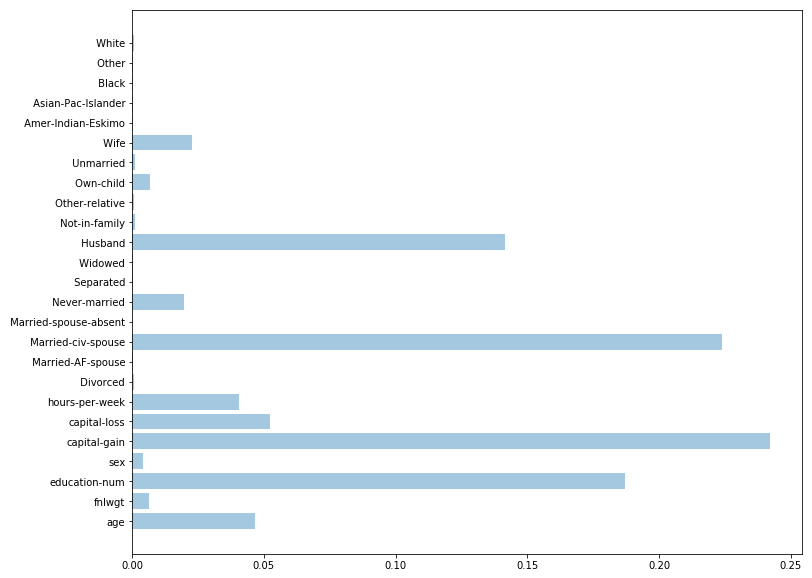

In [66]:
import numpy as np
import matplotlib.pyplot as plt
rforest = RandomForestClassifier(max_depth = 7, max_features = 9, n_estimators = 100, random_state=0)
rforest.fit(X_train, y_train)
%matplotlib inline
plt.figure(figsize = (12,10))
y_list = rforest.feature_importances_
y_pos = np.arange(len(y_list))
features = X_train_org.columns
plt.barh(y_pos, y_list, align='center', alpha=0.4)
plt.yticks(y_pos, features);